In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yfin
from scipy.stats import norm
%matplotlib inline

In [3]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = yfin.download(ticker, start='2007-1-1', end='2017-3-21')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [4]:
log_returns = np.log(1 + data.pct_change())

In [5]:
r = 0.025

In [6]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176585
dtype: float64

In [7]:
type(stdev)

pandas.core.series.Series

In [13]:
stdev = stdev.values
stdev

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [14]:
T = 1.0
t_intervals = 250
delta_t =  T / t_intervals

iterations = 100000

In [15]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)         ##creation of the empty array of the same dimensions
S0 = data.iloc[-1]
S[0] = S0

In [17]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2 ) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [18]:
S

array([[75.88063049, 75.88063049, 75.88063049, ..., 75.88063049,
        75.88063049, 75.88063049],
       [75.20796176, 75.41510379, 76.15052641, ..., 75.3783878 ,
        75.69744228, 78.06637167],
       [76.12100598, 76.034152  , 75.3638012 , ..., 76.56332707,
        75.53970144, 77.15030997],
       ...,
       [77.9850008 , 90.76594792, 75.94177696, ..., 80.86906402,
        52.98318884, 81.14472506],
       [77.75369826, 91.12658073, 74.38039747, ..., 81.47384153,
        51.40687496, 81.1314627 ],
       [78.0502141 , 91.86636257, 74.27494472, ..., 81.36521158,
        51.87865179, 81.48569617]])

In [20]:
S.shape

(251, 100000)

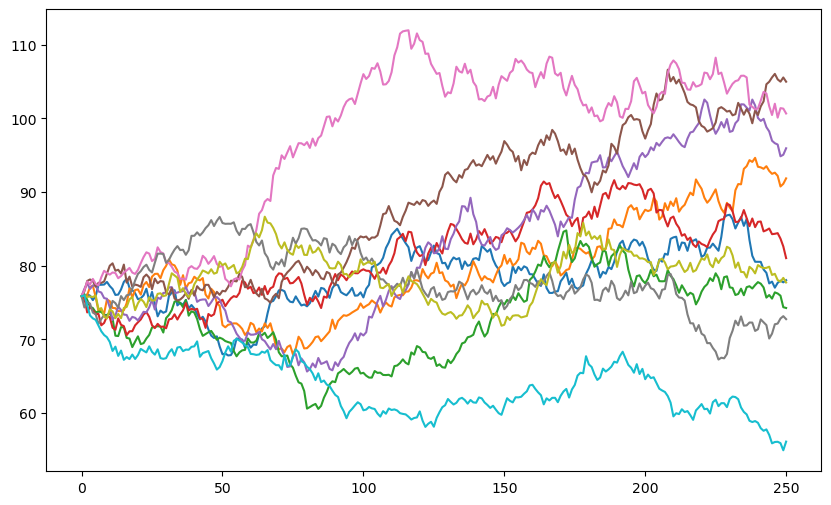

In [23]:
plt.figure(figsize = (10,6))
plt.plot(S[:, :10])
plt.show()